Dimensions of the selected data:
(70, 26)

Structure of the selected data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   3. Proximity to transport                  70 non-null     int64  
 1   4. Proximity to work place                 70 non-null     int64  
 2   5. Proximity to shopping                   70 non-null     int64  
 3   1. Gym/Pool/Sports facility                70 non-null     int64  
 4   2. Parking space                           70 non-null     int64  
 5   3.Power back-up                            70 non-null     int64  
 6   4.Water supply                             70 non-null     int64  
 7   5.Security                                 70 non-null     int64  
 8   1. Exterior look                           70 non-null     int64  
 9   2. Unit size             

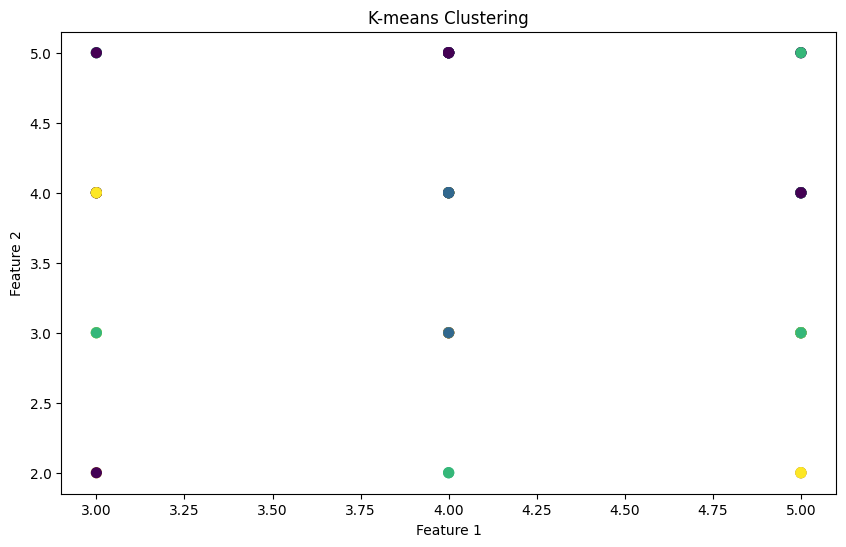

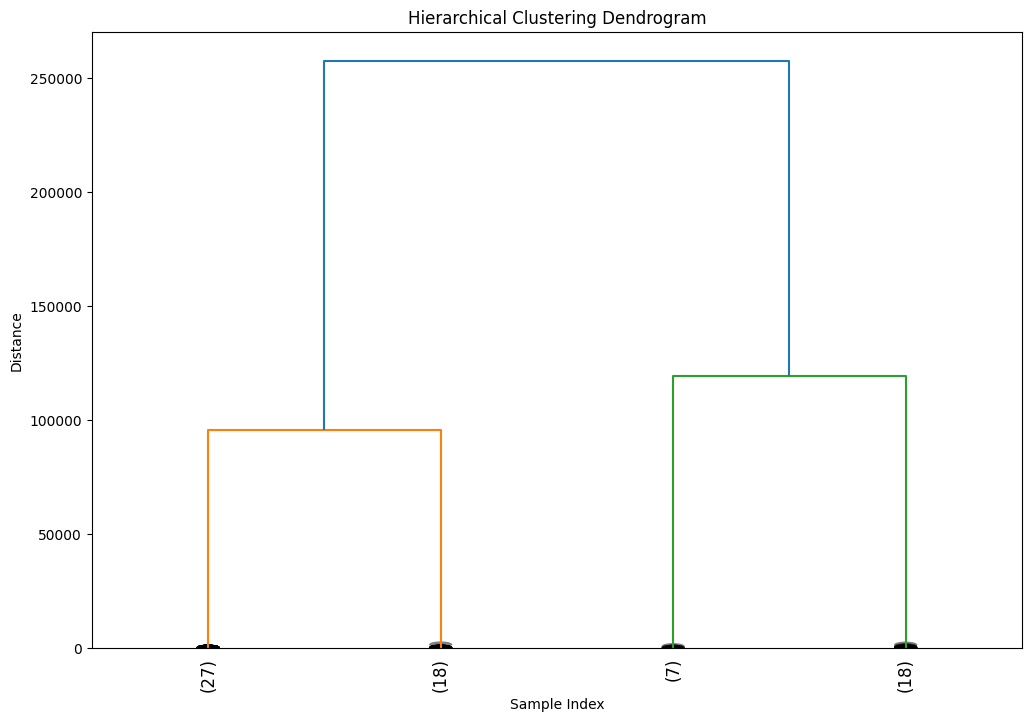

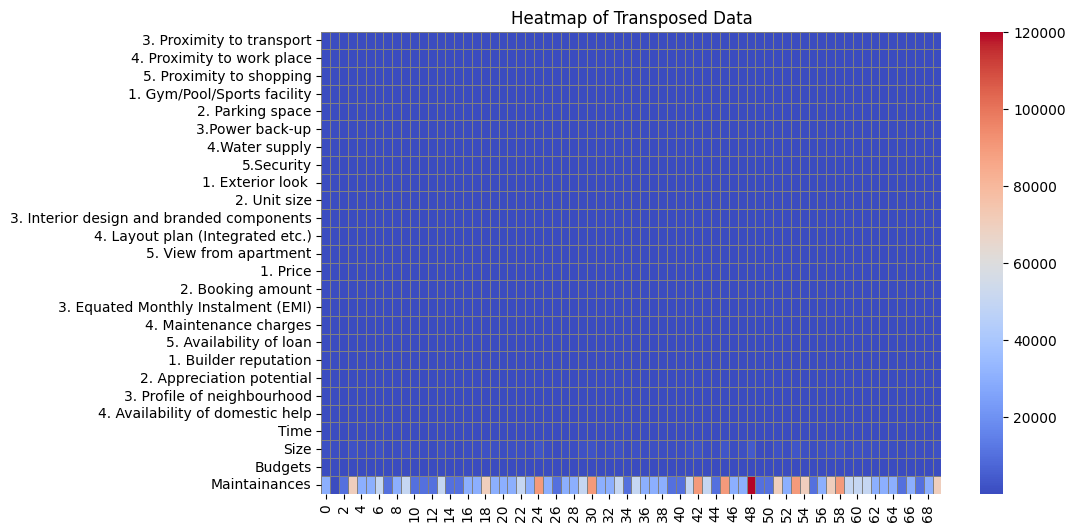

In [2]:
import subprocess
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to auto-install and load packages
def install_and_load(packages):
    for package in packages:
        try:
            importlib.import_module(package)
        except ImportError:
            subprocess.check_call(['pip', 'install', package])
        finally:
            globals()[package] = importlib.import_module(package)

# List of packages to install and load
packages = ["matplotlib", "seaborn", "pandas", "numpy"]

# Install and load required packages
install_and_load(packages)

# Read the survey data
survey_df = pd.read_csv('Survey.csv')

# Select relevant columns for analysis (adjust column indices as per your data)
sur_int = survey_df.iloc[:, 19:45]

# Print dimensions and structure of the selected data
print("Dimensions of the selected data:")
print(sur_int.shape)

print("\nStructure of the selected data:")
print(sur_int.info())

# Perform Cluster Analysis and Characterization

# Summary statistics of selected columns
print("\nSummary statistics of selected columns:")
print(sur_int.describe())

# Perform k-means clustering
np.random.seed(123)
km_res = KMeans(n_clusters=4, n_init=25).fit(sur_int)

# Visualize k-means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(sur_int.values[:, 0], sur_int.values[:, 1], c=km_res.labels_, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perform hierarchical clustering
Z = linkage(sur_int, method='ward')

# Visualize hierarchical clustering results as a dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, p=4, truncate_mode='lastp', leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

# Heatmap visualization of the transposed data
plt.figure(figsize=(10, 6))
sns.heatmap(sur_int.transpose(), cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Transposed Data')
plt.show()
